In [ ]:
import pandas as pd

# Corrected file path to access raw CSV data
file_name = "https://raw.githubusercontent.com/sandhya71/New_Projects/main/insurance.csv"

# Attempt to read the CSV, trying different delimiters if necessary
try:
    insu = pd.read_csv(file_name)
except pd.errors.ParserError:
    # If the default delimiter fails, try others
    insu = pd.read_csv(file_name, sep=';')  # Try semicolon
    # If semicolon doesn't work, you might need to inspect the file manually
    # to determine the correct delimiter.

insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insu.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print ("Rows : ",insu.shape[0])

print ("Columns : ",insu.shape[1])

print ("\nFeatures: \n", insu.columns.tolist())

print ("\nMissing values: ", insu.isnull().sum().values.sum())

print ("\nUnique values: \n", insu.nunique())

Rows :  1338
Columns :  7

Features: 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values:  0

Unique values: 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [ ]:

# Select only numeric columns for correlation calculation
numeric_insu = insu.select_dtypes(include=['number'])

# Calculate correlations on the numeric subset
correlation_matrix = numeric_insu.corr()

print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


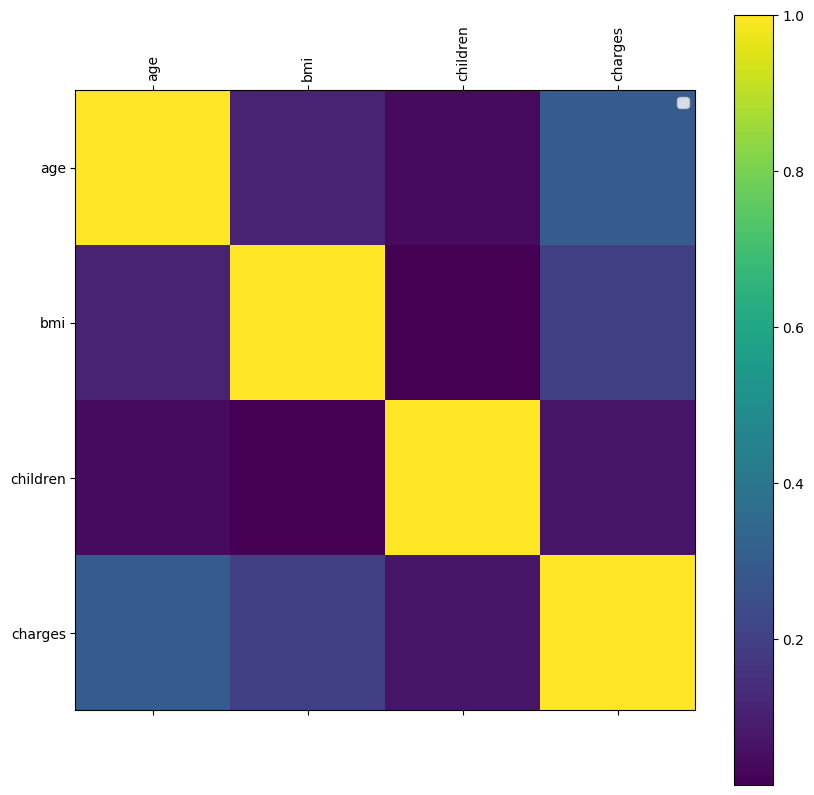

In [ ]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:

    df: pandas DataFrame

    size: vertical and horizontal size of the plot'''

    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=['number'])

    # Calculate correlations on the numeric subset
    corr = numeric_df.corr()  # Calculate correlation matrix within the function

    fig, ax = plt.subplots (figsize=(size, size))

    ax.legend()

    cax = ax.matshow(corr)  # Use the calculated correlation matrix

    fig.colorbar(cax)

    plt.xticks (range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks (range(len(corr.columns)), corr.columns)

plot_corr(insurance)  # Call the function with the DataFrame 'insurance'

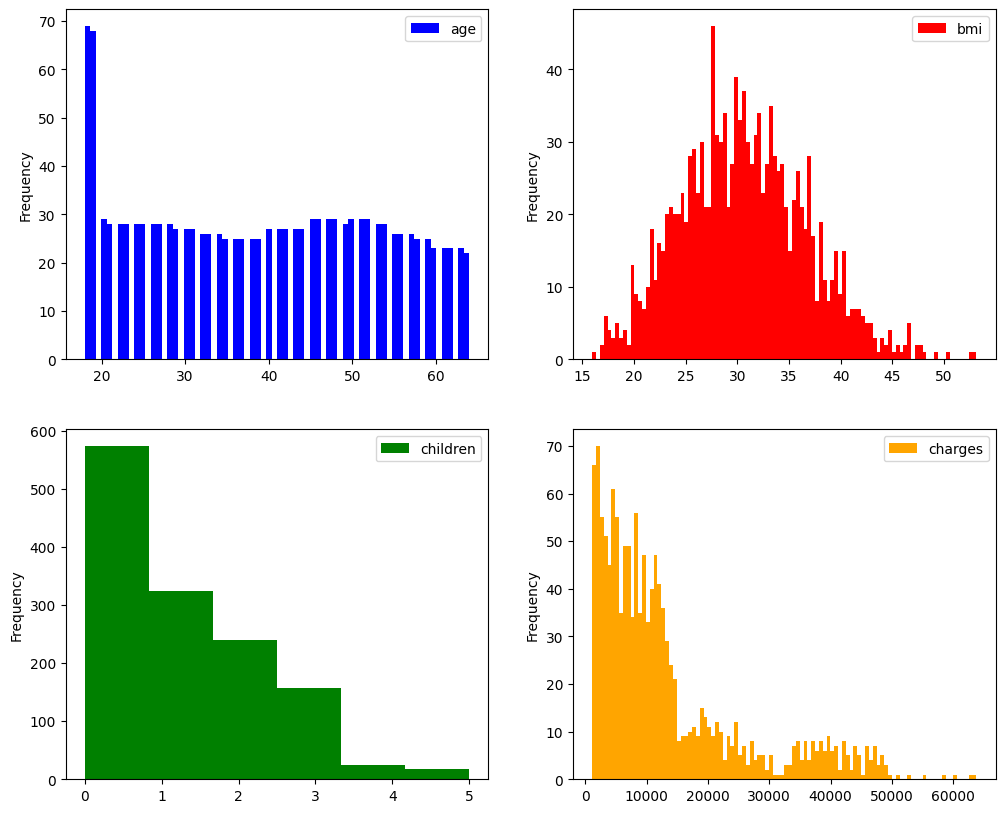

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])

insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="charges", bins=100, color="orange", ax=axes[1][1])

plt.show()

<Axes: xlabel='sex'>

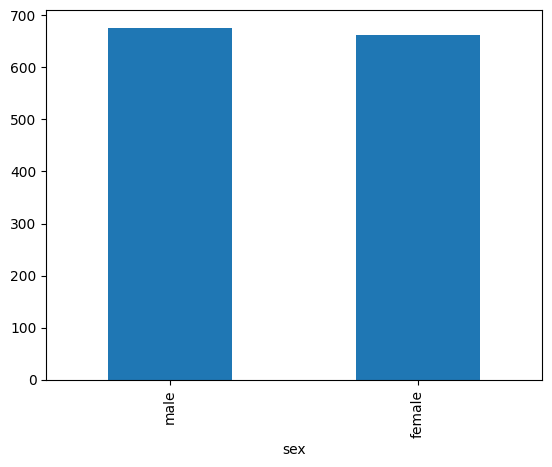

In [ ]:
insurance['sex'].value_counts().plot(kind="bar")

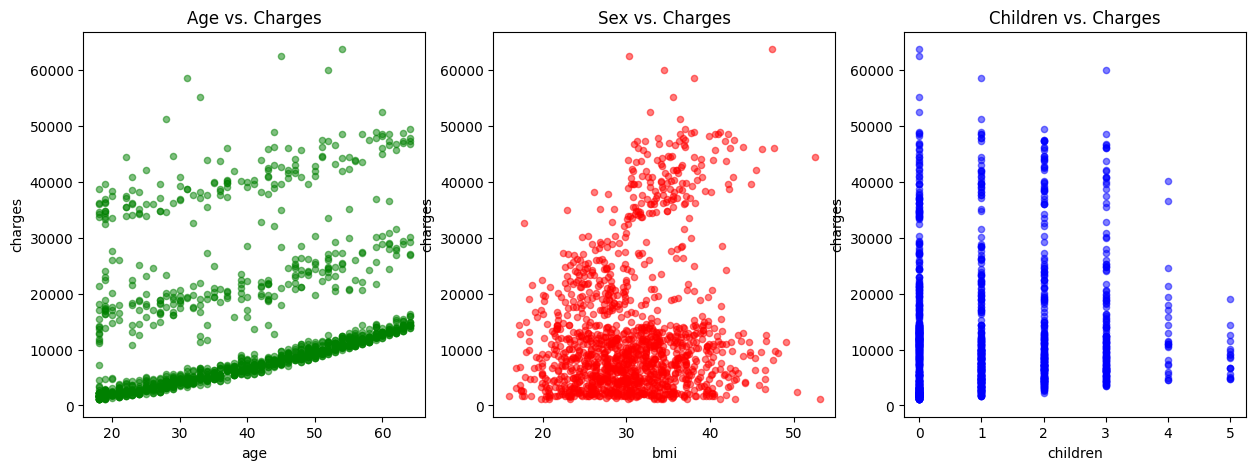

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

insurance.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")

insurance.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="Sex vs. Charges")
insurance.plot(kind='scatter', x="children", y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")

plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

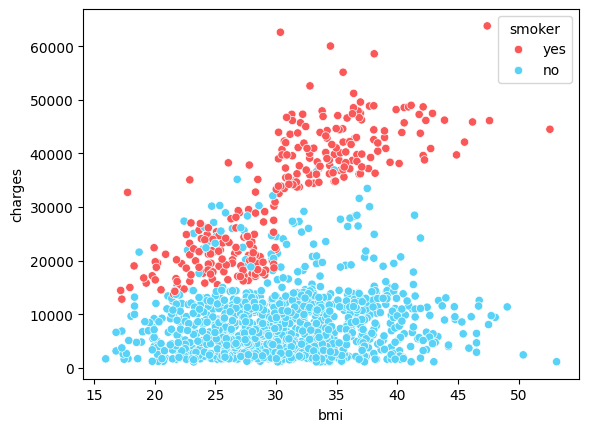

In [ ]:
import seaborn as sns # Imorting Seaborn library

pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="bmi", y="charges", data=insurance, palette=pal, hue='smoker')

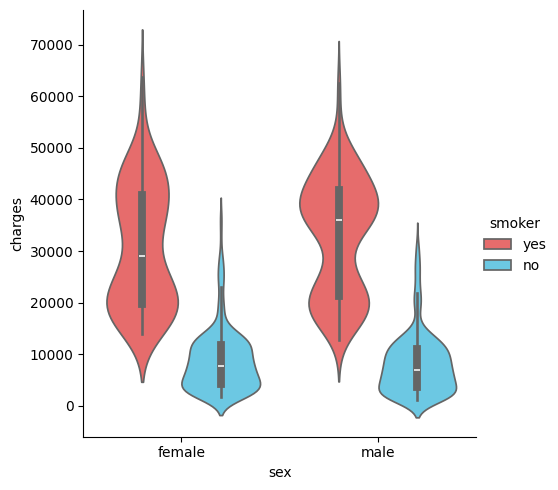

In [ ]:
pal = ["#FA5858", "#58D3F7"]

sns.catplot(x="sex", y="charges", hue="smoker",

kind="violin", data=insurance, palette = pal)

Text(0.5, 1.0, 'Smokers')

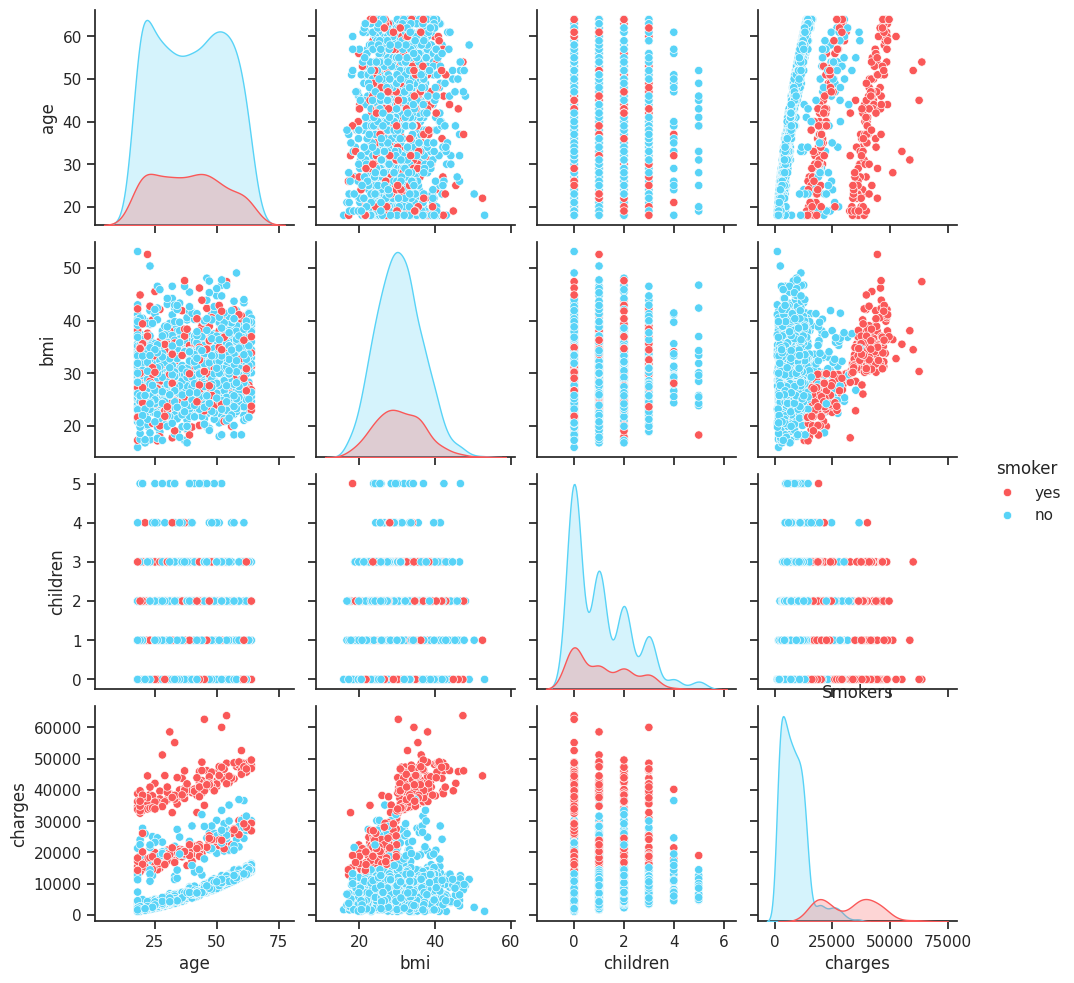

In [ ]:
import seaborn as sns

sns.set(style="ticks")

pal = ["#FA5858", "#58D3F7"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")



**PREPARING FOR MACHINE LEARNING ALGORITHMS**

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.drop(["region"], axis=1, inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in _df_13.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='age', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='age', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='bmi', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='bmi', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
X = insurance.drop(['charges'], axis = 1)
y = insurance.charges

**MODELLING OUR DATA**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to one-hot encode the 'sex' and 'smoker' columns
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['sex', 'smoker']) # Include 'smoker' here
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Apply the transformation to X_train and X_test
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Now fit the LinearRegression model on the transformed data
lr = LinearRegression().fit(X_train_transformed, y_train)

# Continue with your predictions and evaluation
y_train_pred = lr.predict(X_train_transformed)
y_test_pred = lr.predict(X_test_transformed)

print(lr.score(X_test_transformed, y_test))

0.7952171980481995


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53000,11457.247488
610,8547.69130,9925.930740
569,45702.02235,37768.549419
1034,12950.07120,15853.346790
198,9644.25250,6939.119725
...,...,...
574,13224.05705,14429.077741
1174,4433.91590,6705.247131
1327,9377.90470,11152.092298
817,3597.59600,7200.555548


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a ColumnTransformer to handle both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformation to X_train and X_test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Now you can fit your LinearRegression model
# ...

In [ ]:
from sklearn.linear_model import LinearRegression # Import Linear Regression model

# Assuming X_train_transformed is the one-hot encoded version of X_train from previous steps
multiple_linear_reg = LinearRegression(fit_intercept=False) # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train_transformed, y_train) # Fit data to the model using the transformed data

# Remove the 'normalize' argument
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None)

LinearRegression(fit_intercept=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = ['age', 'bmi', 'children']  # Replace with actual numerical columns
categorical_cols = ['sex', 'smoker']  # Replace with actual categorical columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()  # Or any other suitable scaler
categorical_transformer = OneHotEncoder()

# Create a ColumnTransformer to handle both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformation to X_train
X_train_transformed = preprocessor.fit_transform(X_train)

# Create and fit the DecisionTreeRegressor on transformed data
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(X_train_transformed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=13)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
from sklearn.svm import SVR # Import SVR model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)

# Correct the typo 'gamm' to 'gamma'
support_vector_reg = SVR(gamma="auto", kernel="linear", C = 1000 ) # Create a instance for SVR

# Fit the model on the transformed data
support_vector_reg.fit(X_train_transformed, y_train) # Fit data to the model

SVR(C=1000, gamma='auto', kernel='linear')

In [ ]:
from sklearn.model_selection import cross_val_predict # For K-Fold Cross Validatio
from sklearn.metrics import r2_score # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error # For MSE
from math import sqrt # For square root operation

 **Evaluating the Polynomial Regression Model**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test) # Use the same encoding as the training data

# Initialize the model
multiple_linear_reg = LinearRegression()

# Train the model on the transformed training data
multiple_linear_reg.fit(X_train_transformed, y_train)

# Prediction with training dataset
y_pred_MLR_train = multiple_linear_reg.predict(X_train_transformed)

# Prediction with testing dataset
y_pred_MLR_test = multiple_linear_reg.predict(X_test_transformed)

# ... (Rest of your code for evaluation)